In [60]:
import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
import numpy as np
%matplotlib inline
from statsmodels.stats.diagnostic import HetGoldfeldQuandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn as sk
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
font = {'size'   : 16}
matplotlib.rc('font', **font)

In [61]:
def read_data():
    df = pd.read_csv("data/merged_data.csv")
    df.fillna(0, inplace = True)
    df.drop(set(df[df["HIVdiagnoses"] == 0].index), axis=0, inplace=True)
    cols = ["HIVdiagnoses", "HIVprevalence", "PLHIV", "Population"]
    X = pd.DataFrame(index=df["ADULTMEN"].index, columns=cols)
    for col in cols:
        X[col] = df[col]
    y = np.array(df["HIVincidence"])
    return df, X, y

In [62]:
def read_data_new():
    df = pd.read_csv("data/merged_data.csv")
    df.fillna(0, inplace = True)
    df.drop(set(df[df["HIVdiagnoses"] == 0].index), axis=0, inplace=True)
    cols = ['HIVdiagnoses', 'HIVprevalence', 'MSM12MTH', 'MSM5YEAR']
    X = pd.DataFrame(index=df["ADULTMEN"].index, columns=cols)
    for col in cols:
        X[col] = df[col]
    y = np.array(df["HIVincidence"])
    return df, X, y

In [63]:
hiv_data, X, y = read_data()

In [64]:
hiv_data, Z, y = read_data_new()

In [68]:
model = sm.OLS(y, Z)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     92.44
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           8.52e-64
Time:                        13:39:49   Log-Likelihood:                -3564.4
No. Observations:                 747   AIC:                             7137.
Df Residuals:                     743   BIC:                             7155.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses      0.0504      0.018      2.732      0.006       0.014       0.087
HIVprevalence     0.0465      0.003     15.661      0.000       0.041       0.052
MSM12MTH          4.1338      2.988      1.384      0.167      -1.731       9.999
MSM5YEAR         -2.6746      1.933     -1.384      0.167      -6.469       1.119
==============================================================================
Omnibus:                     1791.275   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9830495.800
Skew:                          22.059   Prob(JB):                         0.00
Kurtosis:                     563.261   Cond. No.                     6.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
y_logged = np.log(y)

In [70]:
model = sm.OLS(y_logged, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     800.0
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.62e-267
Time:                        13:39:59   Log-Likelihood:                -1155.8
No. Observations:                 747   AIC:                             2320.
Df Residuals:                     743   BIC:                             2338.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses      0.0032      0.001      2.766      0.006       0.001       0.006
HIVprevalence     0.0058      0.000     47.409      0.000       0.006       0.006
PLHIV            -0.0006   4.01e-05    -14.324      0.000      -0.001      -0.000
Population     2.118e-06   1.33e-07     15.883      0.000    1.86e-06    2.38e-06
==============================================================================
Omnibus:                      493.502   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13985.797
Skew:                          -2.514   Prob(JB):                         0.00
Kurtosis:                      23.593   Cond. No.                     1.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model2 = sm.OLS(y_logged, Z)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     419.7
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          5.87e-189
Time:                        13:40:03   Log-Likelihood:                -1337.8
No. Observations:                 747   AIC:                             2684.
Df Residuals:                     743   BIC:                             2702.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses     -0.0040      0.001     -4.299      0.000      -0.006      -0.002
HIVprevalence     0.0054      0.000     35.704      0.000       0.005       0.006
MSM12MTH          0.1749      0.152      1.153      0.249      -0.123       0.473
MSM5YEAR         -0.1131      0.098     -1.153      0.249      -0.306       0.079
==============================================================================
Omnibus:                      708.294   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29421.160
Skew:                          -4.258   Prob(JB):                         0.00
Kurtosis:                      32.542   Cond. No.                     6.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
params = results.params
params

HIVdiagnoses     0.003220
HIVprevalence    0.005788
PLHIV           -0.000575
Population       0.000002
dtype: float64

In [72]:
params2 = results2.params
parmas2

NameError: name 'parmas2' is not defined

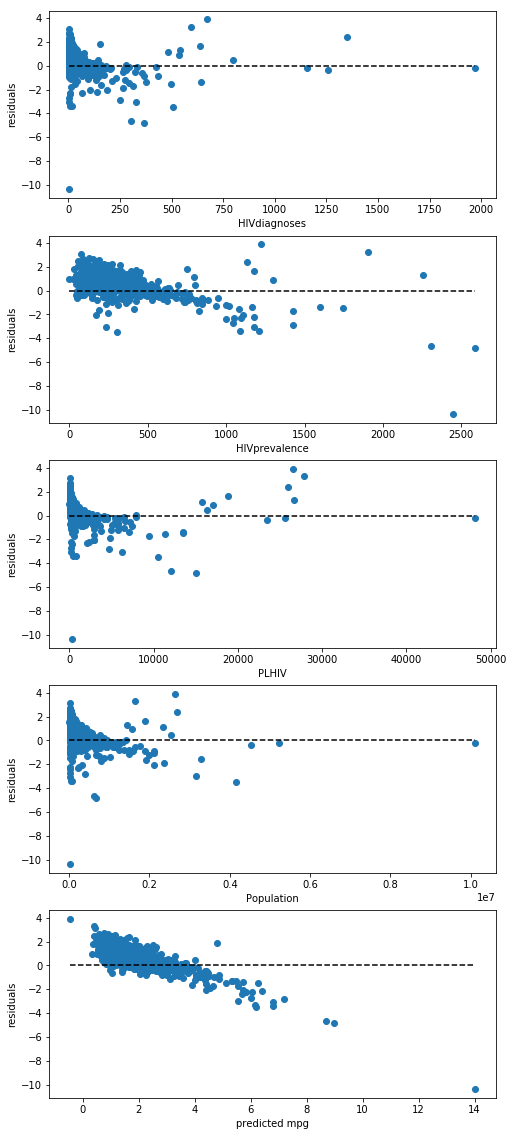

In [10]:
fig, axs = plt.subplots(5,1, figsize=(8,20))

axs[0].scatter(X['HIVdiagnoses'], results.resid)
axs[0].hlines(0,
              X['HIVdiagnoses'].min(), 
              X['HIVdiagnoses'].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('HIVdiagnoses')
axs[0].set_ylabel('residuals');

axs[1].scatter(X['HIVprevalence'], results.resid)
axs[1].hlines(0,
              X['HIVprevalence'].min(), 
              X['HIVprevalence'].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('HIVprevalence')
axs[1].set_ylabel('residuals');

axs[2].scatter(X['PLHIV'], results.resid)
axs[2].hlines(0,
              X['PLHIV'].min(), 
              X['PLHIV'].max(), 
              'k', linestyle='dashed')
axs[2].set_xlabel('PLHIV')
axs[2].set_ylabel('residuals');

axs[3].scatter(X['Population'], results.resid)
axs[3].hlines(0,
              X['Population'].min(), 
              X['Population'].max(), 
              'k', linestyle='dashed')
axs[3].set_xlabel('Population')
axs[3].set_ylabel('residuals');


axs[4].scatter(results.fittedvalues, results.resid)
axs[4].hlines(0,
              results.fittedvalues.min(), 
              results.fittedvalues.max(),
              'k', linestyle='dashed')
axs[4].set_xlabel('predicted mpg')
axs[4].set_ylabel('residuals');

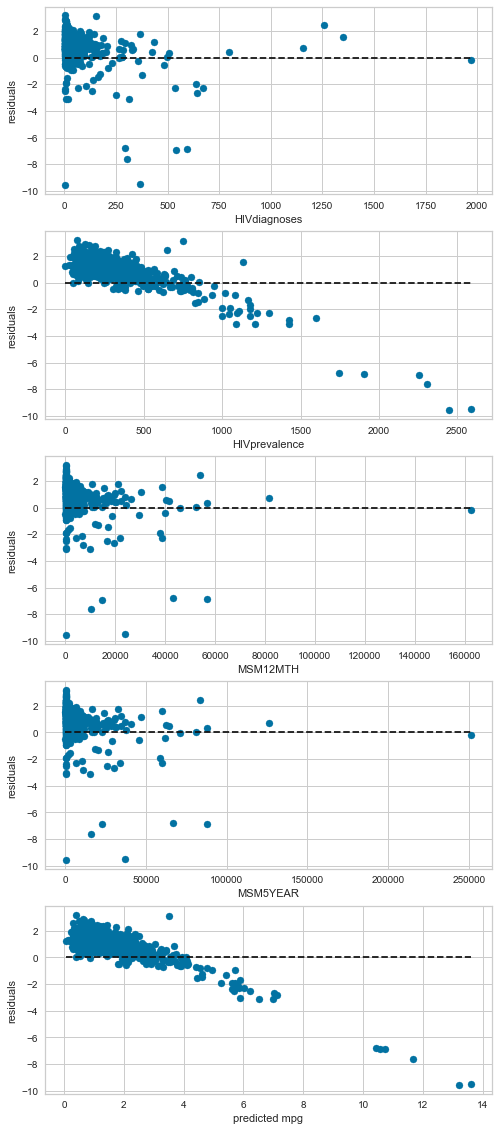

In [74]:
fig, axs = plt.subplots(5,1, figsize=(8,20))

axs[0].scatter(Z['HIVdiagnoses'], results2.resid)
axs[0].hlines(0,
              Z['HIVdiagnoses'].min(), 
              Z['HIVdiagnoses'].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('HIVdiagnoses')
axs[0].set_ylabel('residuals');

axs[1].scatter(Z['HIVprevalence'], results2.resid)
axs[1].hlines(0,
              Z['HIVprevalence'].min(), 
              Z['HIVprevalence'].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('HIVprevalence')
axs[1].set_ylabel('residuals');

axs[2].scatter(Z['MSM12MTH'], results2.resid)
axs[2].hlines(0,
              Z['MSM12MTH'].min(), 
              Z['MSM12MTH'].max(), 
              'k', linestyle='dashed')
axs[2].set_xlabel('MSM12MTH')
axs[2].set_ylabel('residuals');

axs[3].scatter(Z['MSM5YEAR'], results2.resid)
axs[3].hlines(0,
              Z['MSM5YEAR'].min(), 
              Z['MSM5YEAR'].max(), 
              'k', linestyle='dashed')
axs[3].set_xlabel('MSM5YEAR')
axs[3].set_ylabel('residuals');


axs[4].scatter(results2.fittedvalues, results2.resid)
axs[4].hlines(0,
              results2.fittedvalues.min(), 
              results2.fittedvalues.max(),
              'k', linestyle='dashed')
axs[4].set_xlabel('predicted mpg')
axs[4].set_ylabel('residuals');

In [11]:
f_statistic, p_value, _ = sm.stats.diagnostic.het_goldfeldquandt(y_logged, X, idx=1, alternative='two-sided')
print(p_value)

6.563169455896138e-55


In [75]:
f_statistic2, p_value2, _ = sm.stats.diagnostic.het_goldfeldquandt(y_logged, Z, idx=1, alternative='two-sided')
print(p_value2)

6.573399632979951e-53


In [12]:
stud_resids = results.outlier_test()['student_resid']


In [76]:
stud_resids2 = results2.outlier_test()['student_resid']

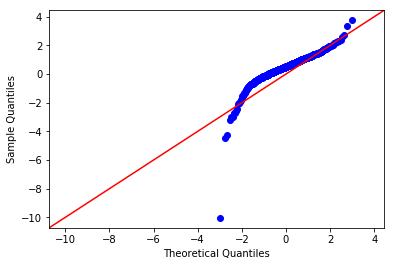

In [13]:
ax = sm.graphics.qqplot(stud_resids, line='45')

In [43]:
X_train, X_test, y_train, y_test = ms.train_test_split(X.values, y_logged, test_size =.25)
model = sm.OLS(y_train, X_train)
res = model.fit()
y_pred = res.predict(X_test)

In [39]:
r = sp.stats.linregress(y_pred,y_test)
r[2]

0.6720181870449962

In [77]:
X_train2, X_test2, y_train2, y_test2 = ms.train_test_split(Z.values, y_logged, test_size =.25)
model2 = sm.OLS(y_train2, X_train2)
res2 = model.fit()
y_pred2 = res.predict(X_test2)
r2 = sp.stats.linregress(y_pred2,y_test2)
r2[2]

-0.006984329354567489

In [54]:
reg = LinearRegression(fit_intercept=True).fit(X, y_logged)

In [50]:
cvr = ms.cross_validate(reg,X,y,cv=20,return_train_score=True)

In [52]:
print(cvr)

{'fit_time': array([0.00253415, 0.00275517, 0.00175905, 0.00170088, 0.00158787,
       0.00121307, 0.00223422, 0.00172281, 0.00150824, 0.00161409,
       0.00126386, 0.00119615, 0.00113893, 0.00106692, 0.001055  ,
       0.00118279, 0.00222611, 0.00145698, 0.00111008, 0.00132084]), 'score_time': array([0.00147986, 0.00103307, 0.00110197, 0.00114727, 0.000947  ,
       0.00110817, 0.00132179, 0.00098991, 0.00096393, 0.00072503,
       0.00067782, 0.00068784, 0.0006721 , 0.00068307, 0.00067711,
       0.00067115, 0.00173402, 0.00067496, 0.000664  , 0.00081301]), 'test_score': array([  0.53469374,  -1.88324401,   0.78079022,  -2.91521016,
        -0.03593605,   0.83836347,   0.07801777,   0.65245304,
         0.71191586,   0.67121828,   0.64654559, -13.93963266,
         0.51588385,   0.67655855,   0.80224397,   0.73629144,
         0.35830783,  -0.31796764,   0.38828206,   0.67563274]), 'train_score': array([0.20136776, 0.2080175 , 0.2006621 , 0.21944194, 0.20221557,
       0.20167535, 0

In [78]:
reg2 = LinearRegression(fit_intercept=True).fit(Z, y_logged)
cvr2 = ms.cross_validate(reg,Z,y,cv=20,return_train_score=True)
print(cvr2)

{'fit_time': array([0.00292015, 0.00247097, 0.0013051 , 0.00183296, 0.00173688,
       0.00142384, 0.00157285, 0.0021348 , 0.00227213, 0.00166512,
       0.00130773, 0.00157332, 0.00225592, 0.00181603, 0.00128269,
       0.00125694, 0.00135803, 0.00129199, 0.00126219, 0.00126171]), 'score_time': array([0.001127  , 0.00084972, 0.00106001, 0.0008688 , 0.00131392,
       0.00072289, 0.00123096, 0.00142813, 0.00104499, 0.00077176,
       0.00073099, 0.00073791, 0.00153303, 0.00074601, 0.00073338,
       0.00072718, 0.00092316, 0.00073409, 0.00078297, 0.00072908]), 'test_score': array([ 0.34759934, -3.30567868,  0.44007354, -0.16570996,  0.21458086,
        0.75332802,  0.03964782,  0.63497102,  0.45026822,  0.52191422,
        0.51354488, -1.03925689,  0.46122465,  0.46222281,  0.061924  ,
        0.64042822,  0.49644601,  0.20568976,  0.28929547,  0.52541193]), 'train_score': array([0.14385525, 0.15073693, 0.14309135, 0.14711522, 0.1378445 ,
       0.14261961, 0.52768093, 0.13783348, 0.14

In [53]:
from yellowbrick.regressor import ResidualsPlot

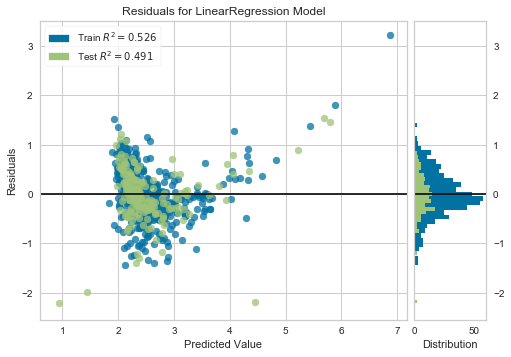

In [56]:
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

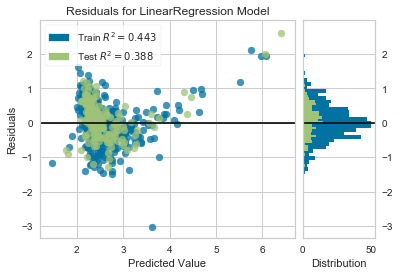

In [79]:
visualizer2 = ResidualsPlot(reg2)
visualizer2.fit(X_train2, y_train2)
visualizer2.score(X_test2, y_test2)
visualizer2.poof() 

Index(['Unnamed: 0', 'county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR',
       'AMAT_fac', 'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income'],
      dtype='object')